In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import points_from_xy
import matplotlib as plt
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

In [2]:
hoods = gpd.read_file("/Users/hendrixperalta/Desktop/Research Data Manipulation/research_data/adm2/map_files/adm2_shp.shp")

In [3]:
sez = pd.read_csv("sez_aggregated.csv")

In [4]:
sez.head(5)

,code,name,latitude,longitude,year,close,type,sez_id,origin,inv2000,...,sal_tec2006,sal_tec2007,sal_tec2008,sal_tec2010,sal_tec2011,sal_tec2012,sal_tec2013,sal_tec2014,sal_tec2015,sal_tec2016
0,0,0,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0
1,DOM-6NO,Zona Franca 6 de Noviembre,18.434236,-70.077097,2016.0,0.0,private,1.0,1.0,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2500.0
2,DOM-ALC,Los Alcarrizos,18.521192,-70.050865,1990.0,0.0,public,2.0,1.0,19853638.95,...,2770.28,3446.06,2969.16,3389.04,3762.0,3197.77,3533.52,3852.34,4420.89,4293.0
3,DOM-ALT,Villa Altagracia,18.687048,-70.180632,1988.0,0.0,private,3.0,1.0,33900000.00,...,2167.86,3489.29,3026.84,2903.04,5212.5,4772.18,4996.25,5007.53,5640.68,5610.0
4,DOM-AND,Andres,18.442336,-69.649780,2009.0,0.0,private,4.0,1.0,0.00,...,0.00,0.00,0.00,3675.25,3654.0,6025.00,5077.00,7045.37,6936.53,7100.0


In [5]:
sez.dtypes

code            object
name            object
latitude       float64
longitude      float64
year           float64
                ...   
sal_tec2012    float64
sal_tec2013    float64
sal_tec2014    float64
sal_tec2015    float64
sal_tec2016    float64
Length: 291, dtype: object

<Axes: xlabel='longitude', ylabel='latitude'>

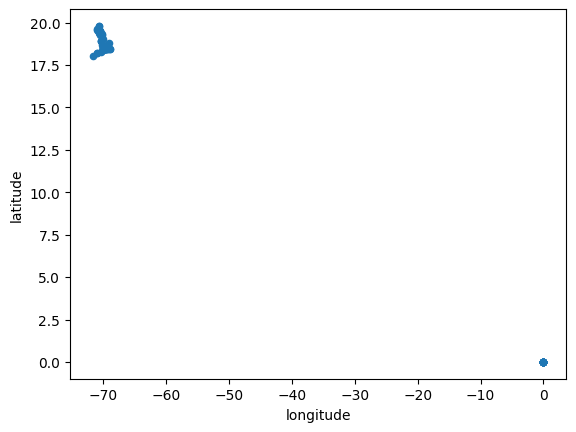

In [6]:
sez.plot(
    kind='scatter', x="longitude", y="latitude"
)


In [7]:
hoods.crs

<Geographic 2D CRS: GEOGCS["GCS_unknown",DATUM["WGS_1984",SPHEROID["WG ...>
Name: GCS_unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
sez_gdf = gpd.GeoDataFrame(
    sez, crs = hoods.crs,
    geometry = points_from_xy(
        sez["longitude"], sez["latitude"]
    )
)

In [9]:
sez_gdf.head()

,code,name,latitude,longitude,year,close,type,sez_id,origin,inv2000,...,sal_tec2007,sal_tec2008,sal_tec2010,sal_tec2011,sal_tec2012,sal_tec2013,sal_tec2014,sal_tec2015,sal_tec2016,geometry
0,0,0,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,POINT (0.00000 0.00000)
1,DOM-6NO,Zona Franca 6 de Noviembre,18.434236,-70.077097,2016.0,0.0,private,1.0,1.0,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2500.0,POINT (-70.07710 18.43424)
2,DOM-ALC,Los Alcarrizos,18.521192,-70.050865,1990.0,0.0,public,2.0,1.0,19853638.95,...,3446.06,2969.16,3389.04,3762.0,3197.77,3533.52,3852.34,4420.89,4293.0,POINT (-70.05087 18.52119)
3,DOM-ALT,Villa Altagracia,18.687048,-70.180632,1988.0,0.0,private,3.0,1.0,33900000.00,...,3489.29,3026.84,2903.04,5212.5,4772.18,4996.25,5007.53,5640.68,5610.0,POINT (-70.18063 18.68705)
4,DOM-AND,Andres,18.442336,-69.649780,2009.0,0.0,private,4.0,1.0,0.00,...,0.00,0.00,3675.25,3654.0,6025.00,5077.00,7045.37,6936.53,7100.0,POINT (-69.64978 18.44234)


In [10]:
sez_gdf.to_csv("sez_gdf.csv")

In [11]:
sez_gdf.explore(
    titles = "CartoDB positron",
    cmap = "plasma", 
    style_kwds=dict(color = "black")
)

In [12]:
#%%timeit
joined = gpd.sjoin(
    sez_gdf,
    hoods,
    how="right",
    predicate="within"
)

In [13]:
joined.fillna(0, inplace = True)

In [14]:
agg_func = {col: "sum" for col in joined.columns}
del agg_func['geometry']

In [15]:
joined["id"] = pd.to_numeric(joined["id"], errors = "coerce")

In [16]:
mean_columns = joined.columns[joined.columns.str.contains('sal|id', regex=True)]


In [17]:
for col in mean_columns:
    if col in agg_func:
        agg_func[col] = "mean"

In [18]:
types = joined[joined.columns[joined.columns.str.contains('sal|id')]].dtypes

In [19]:
types.to_csv("types.csv")

In [20]:
res_dissolve = joined.dissolve(by="id", aggfunc=agg_func)

In [21]:
res_dissolve

,geometry,index_left,code,name,latitude,longitude,year,close,type,sez_id,...,sal_tec2008,sal_tec2010,sal_tec2011,sal_tec2012,sal_tec2013,sal_tec2014,sal_tec2015,sal_tec2016,id,shapeName
id,,,,,,,,,,,,,,,,,,,,,
0,"POLYGON ((-70.87020 19.00243, -70.87011 19.002...",0.0,0,0,0.000000,0.000000,0.0,0.0,0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Constanza
1,"POLYGON ((-69.62430 18.99220, -69.61392 19.036...",0.0,0,0,0.000000,0.000000,0.0,0.0,0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.0,Sabana De La Mar
2,"POLYGON ((-70.58050 19.39080, -70.57127 19.393...",58.0,DOM-MOC,Moca,19.390233,-70.537286,1989.0,0.0,public,58.0,...,2780.42,2684.83,2750.0,3550.31,3587.22,4106.91,4287.64,4488.96,2.0,Moca
3,"POLYGON ((-69.62233 18.99161, -69.61997 18.990...",0.0,0,0,0.000000,0.000000,0.0,0.0,0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.0,Bayaguana
4,"POLYGON ((-70.02195 19.28010, -70.02173 19.282...",0.0,0,0,0.000000,0.000000,0.0,0.0,0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,4.0,El Factor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,"POLYGON ((-68.78489 18.17334, -68.78454 18.174...",0.0,0,0,0.000000,0.000000,0.0,0.0,0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,157.0,Isla Saona
158,"POLYGON ((-69.02572 18.35603, -69.02494 18.356...",0.0,0,0,0.000000,0.000000,0.0,0.0,0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,158.0,Isla Catalina
159,"POLYGON ((-69.78639 18.57452, -69.78634 18.574...",0.0,0,0,0.000000,0.000000,0.0,0.0,0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,159.0,San Luis


In [22]:
hoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         162 non-null    object  
 1   shapeName  162 non-null    object  
 2   geometry   162 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 3.9+ KB


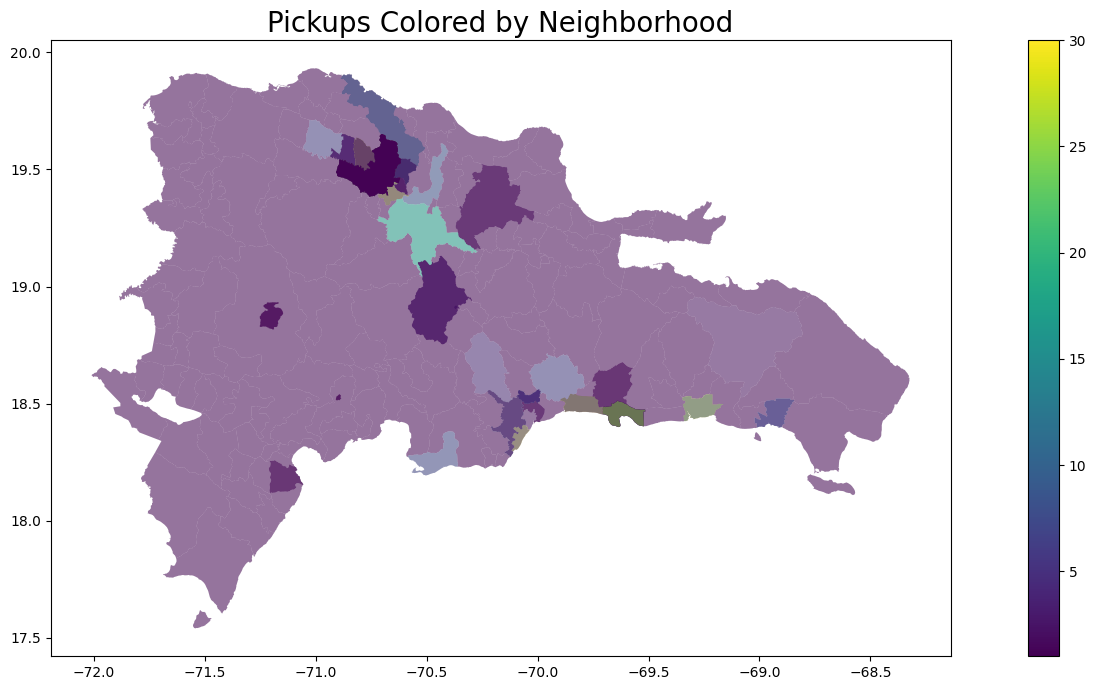

In [23]:
import matplotlib.pyplot as plt

cmap = LinearSegmentedColormap.from_list("custom_blue_red", ["blue", "red"])

fig, ax = plt.subplots(figsize=(20, 8))

joined.plot(ax=ax, color="lightgrey", alpha=0.5)
            
joined.plot(ax=ax, alpha=0.5, markersize=2, column="ent2015", 
            legend=True, vmin=1, vmax=30)
plt.title("Pickups Colored by Neighborhood", fontsize=20);


In [24]:
joined.drop(columns = 'geometry').to_csv("joined.csv")

In [25]:
res_nogeo = res_dissolve.drop(columns = "geometry")
res_nogeo.to_csv("joined_sez_map.csv")